# Maven Analytics 'Kickstarter Projects' Analysis

### Importing important libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
# Setting canvas style to "whitegrid"
sns.set_style('whitegrid')

In [11]:
kick_starter_data = pd.read_csv("C:\\Users\\hp\\Documents\\Project 2\\Project Dataset\\kickstarter_projects.csv")

In [12]:
kick_starter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


***(ID	Internal kickstarter id)
(Name	Name of the project)
(Category	Project category)
(Subcategory	Project subcategory)
(Country	Country the project is from)
(Launched	Date the project was launched)
(Deadline	Deadline date for crowdfunding)
(Goal	Amount of money the creator needs to complete the project (USD))
(Pledged	Amount of money pledged by the crowd (USD))
(Backers	Number of backers)
(State	Current condition the project is in (as of 2018-01-02))***


In [13]:
kick_starter_data.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27,2009-05-26,1900,387,10,Failed


***We will add and remore some columns here like launched-deadline date differences and remove name column***

In [14]:
kick_starter_usable = kick_starter_data.drop("Name",axis=1)

In [15]:
kick_starter_usable['Date_Diff']= pd.to_datetime(kick_starter_data['Deadline'])-pd.to_datetime(kick_starter_data['Launched'])

In [16]:
kick_starter_usable

,ID,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Date_Diff
0,1860890148,Fashion,Fashion,United States,2009-04-21,2009-05-31,1000,625,30,Failed,40 days
1,709707365,Film & Video,Shorts,United States,2009-04-23,2009-07-20,80000,22,3,Failed,88 days
2,1703704063,Art,Illustration,United States,2009-04-24,2009-05-03,20,35,3,Successful,9 days
3,727286,Technology,Software,United States,2009-04-25,2009-07-14,99,145,25,Successful,80 days
4,1622952265,Fashion,Fashion,United States,2009-04-27,2009-05-26,1900,387,10,Failed,29 days
...,...,...,...,...,...,...,...,...,...,...,...
374848,1486845240,Music,Hip-Hop,United States,2018-01-02,2018-01-16,500,0,0,Live,14 days
374849,974738310,Design,Product Design,United States,2018-01-02,2018-02-09,15000,269,8,Live,38 days
374850,2106246194,Food,Food,United States,2018-01-02,2018-01-16,10000,165,3,Live,14 days
374851,1830173355,Art,Art,United States,2018-01-02,2018-02-01,650,7,1,Live,30 days


### Performing descriptive analysis and exploratory data analysis 

In [17]:
kick_starter_usable.describe(include='object')

,Category,Subcategory,Country,Launched,Deadline,State
count,374853,374853,374853,374853,374853,374853
unique,15,159,22,3168,3164,5
top,Film & Video,Product Design,United States,2014-07-09,2014-08-08,Failed
freq,62694,22310,292618,924,702,197611


In [18]:
kick_starter_data[['Goal','Pledged','Backers']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Goal,374853.0,45863.784796,1.158778e+06,0.0,2000.0,5500.0,16000.0,166361391.0
Pledged,374853.0,9121.072719,9.132054e+04,0.0,31.0,625.0,4051.0,20338986.0
Backers,374853.0,106.690359,9.117185e+02,0.0,2.0,12.0,57.0,219382.0


In [19]:
kick_starter_usable['Category'].value_counts().sort_values(ascending=False)

Film & Video    62694
Music           49529
Publishing      39378
Games           35225
Technology      32562
Design          30065
Art             28151
Food            24599
Fashion         22812
Theater         10911
Comics          10819
Photography     10778
Crafts           8809
Journalism       4754
Dance            3767
Name: Category, dtype: int64

#### Plotting each category projects

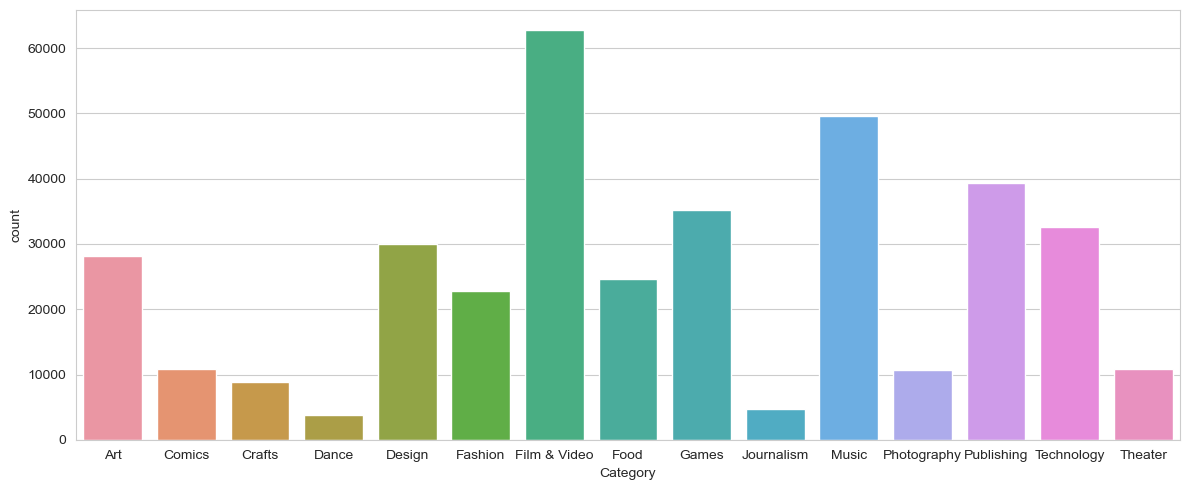

In [21]:
plt.figure(figsize=(12,5))
sns.countplot(data=kick_starter_usable.sort_values(by='Category'),x='Category')
plt.tight_layout()

***Here we can see that result according to overall category distribution of projects we will analyze the success of the projects & try to relate it with the average goal according to category & country***

#### Plotting box plot for goals wrt each State of the project

<AxesSubplot:xlabel='State', ylabel='Goal'>

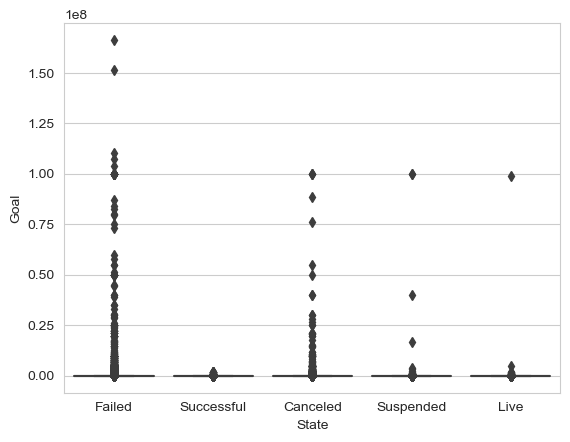

In [22]:
sns.boxplot(x="State", y="Goal", data=kick_starter_usable)

**Here we can conclude that the goal for successful projects were very relevant & small also very less dispersed where as the goals for other statuses are very high and very dispersed in the whole picture but the data include for more than 22 country data so we need to further analyze the results** 

kick_starter_success_project=kick_starter_usable[kick_starter_usable['State']=='Successful']

plt.figure(figsize=(12,5))
sns.countplot(data=kick_starter_success_project.sort_values(by='Category'),x='Category')
plt.tight_layout()

**Reading the success rate data which is from the analysis of dataset in Google BigQuery**

In [23]:
project_success_rate=pd.read_csv("C:\\Users\\hp\\Documents\\Project 2\\SQL Data\\ProjectsSucessRateData.csv")

#### Plotting Success Rate of each category

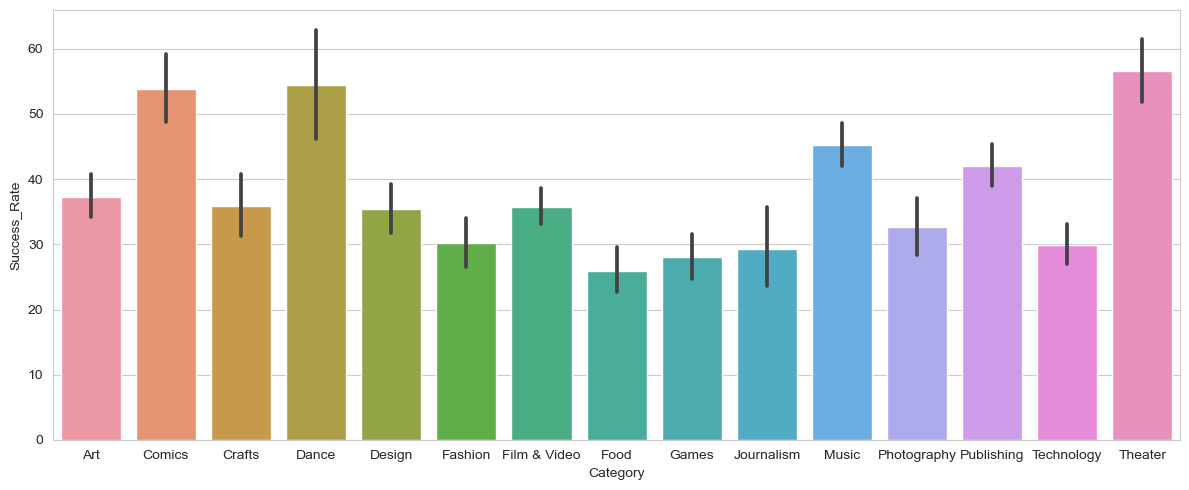

In [25]:
plt.figure(figsize=(12,5))
sns.barplot(x='Category',y='Success_Rate',data=project_success_rate)
plt.tight_layout()

Average success rate changes but it is fairly linear wrt the total project count & it is maximum for **Theater,Dance,Comics,Music,Publishing,Art,Crafts,Film & video,Design,Photography**

In [26]:
kick_starter_usable[['Goal']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Goal,374853.0,45863.784796,1.158778e+06,0.0,2000.0,5500.0,16000.0,166361391.0


In [27]:
kick_starter_usable_grouped_category = kick_starter_usable.groupby(['Category'])

In [28]:
df_grouped_category = kick_starter_usable_grouped_category['Goal'].mean()

In [29]:
df_grouped_category.sort_values(ascending=False)

Category
Technology      102202.381334
Journalism       86017.885570
Film & Video     83737.413150
Food             49042.827310
Games            44927.140979
Design           41875.654449
Art              39199.586338
Theater          27090.631290
Publishing       25056.495911
Fashion          22411.104901
Comics           19571.432295
Music            15921.241111
Photography      12267.914641
Crafts           10434.469406
Dance             9580.253783
Name: Goal, dtype: float64

#### Plotting Avg Goal Amount for each category

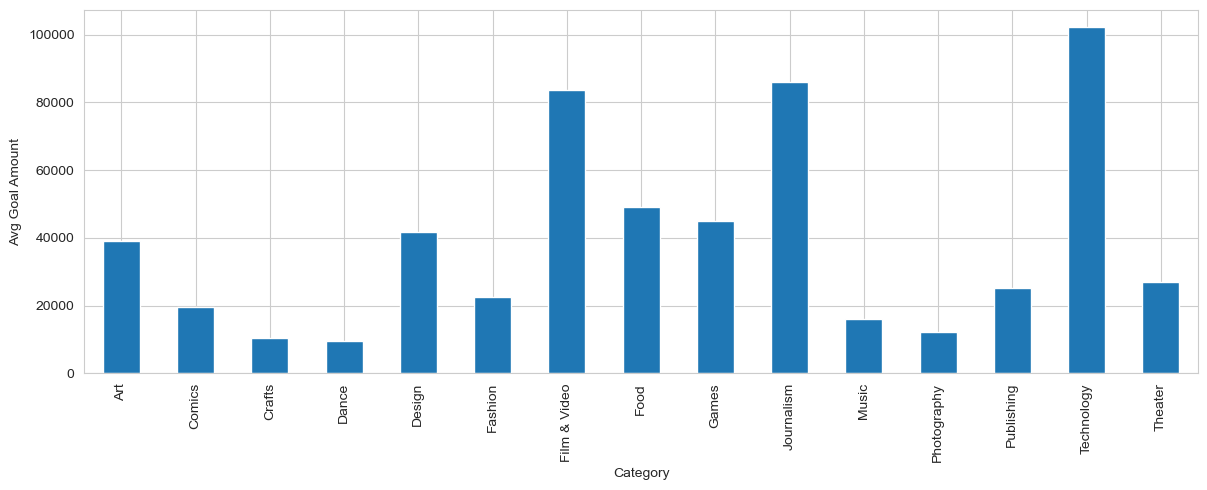

In [30]:
plt.figure(figsize=(12,5))
df_grouped_category.plot(kind='bar');
plt.tight_layout()
plt.ylabel('Avg Goal Amount');

Avg goals were higher for **Technology,Journalism,Film & Video,Games,Design,Art,Theater,Publishing,Fashoin,Comics**

### Analyzing data with respect to each country

In [48]:
kick_starter_usable_sorted_country = kick_starter_usable.sort_values(by='Country')

In [54]:
country_project_count = kick_starter_usable_sorted_country['Country'].value_counts()

In [51]:
country_success_project = kick_starter_usable_sorted_country[kick_starter_usable['State']=='Successful']

C:\Users\hp\AppData\Local\Temp\ipykernel_6844\3581835932.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  country_success_project = kick_starter_usable_sorted_country[kick_starter_usable['State']=='Successful']


In [57]:
country_success_project.sort_values(by='Country')

,ID,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Date_Diff
266466,1176890840,Games,Video Games,Australia,2016-01-04,2016-01-11,2060,2135,18,Successful,7 days
361524,1934756995,Music,Music,Australia,2017-09-22,2017-10-22,3055,3437,94,Successful,30 days
158273,1625379561,Crafts,Crafts,Australia,2014-07-23,2014-08-22,559,1025,19,Successful,30 days
252495,1260273521,Publishing,Children's Books,Australia,2015-10-11,2015-11-10,5711,6405,101,Successful,30 days
361644,1611209524,Design,Product Design,Australia,2017-09-23,2017-10-13,3916,5602,43,Successful,20 days
...,...,...,...,...,...,...,...,...,...,...,...
269884,1786874156,Games,Tabletop Games,United States,2016-01-26,2016-02-22,1400,1635,34,Successful,27 days
269878,1071483345,Film & Video,Drama,United States,2016-01-26,2016-02-25,6000,6010,24,Successful,30 days
269874,15622594,Music,Music,United States,2016-01-26,2016-02-25,550,1017,35,Successful,30 days
269871,442757976,Comics,Graphic Novels,United States,2016-01-26,2016-02-25,40000,161169,3851,Successful,30 days


In [62]:
country_success_project_count = country_success_project['Country'].value_counts()

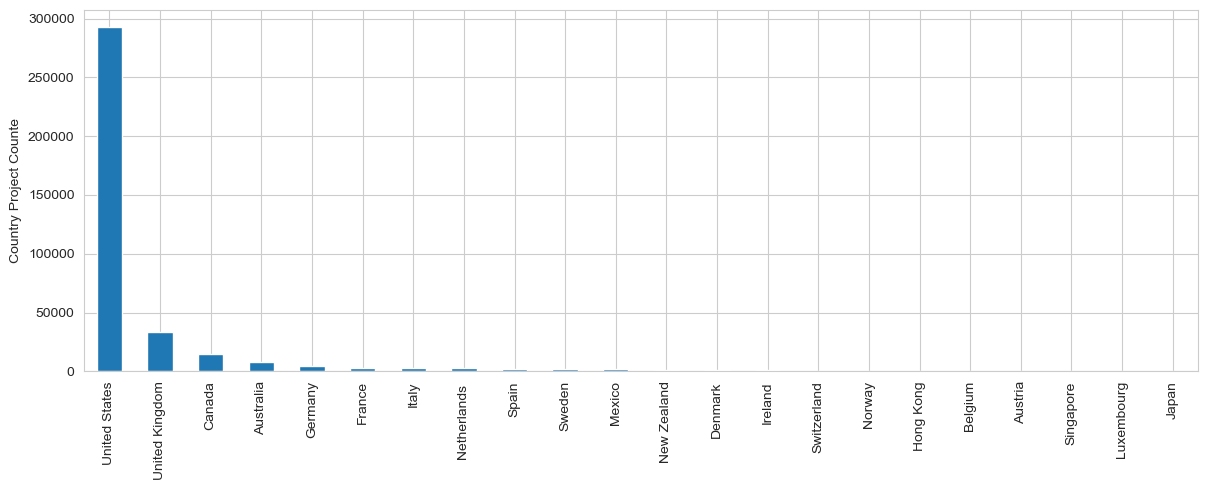

In [63]:
plt.figure(figsize=(12,5))
country_project_count.plot(kind='bar');
plt.tight_layout()
plt.ylabel('Country Project Counte');

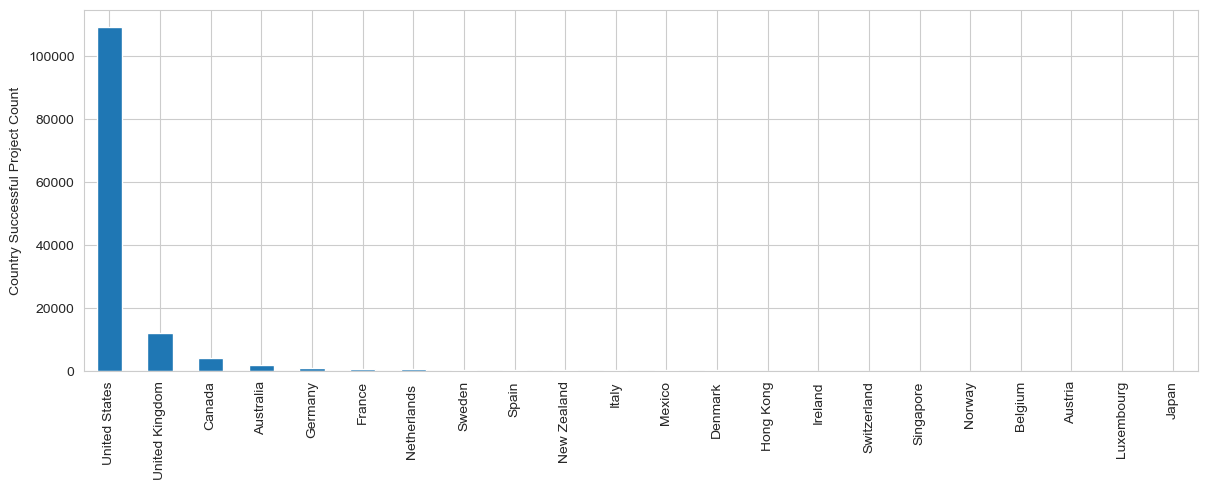

In [64]:
plt.figure(figsize=(12,5))
country_success_project_count.plot(kind='bar');
plt.tight_layout()
plt.ylabel('Country Successful Project Count');

In [65]:
import math
country_success_percentage = np.round((country_success_project_count/country_project_count)*100)

In [66]:
country_success_percentage.sort_values(ascending=False,inplace=True)

#### Plotting Country's Success Percentage

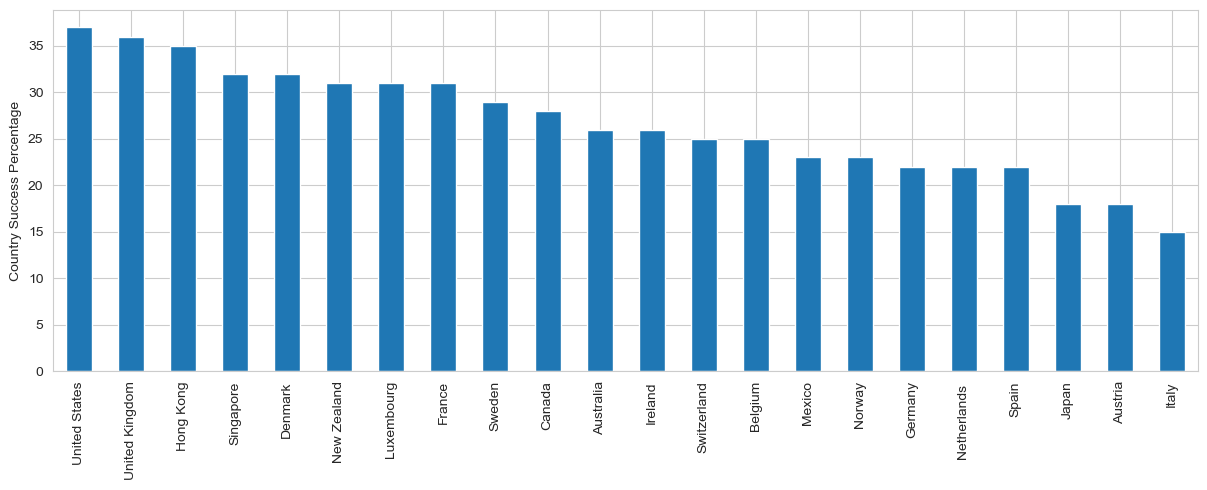

In [78]:
plt.figure(figsize=(12,5))
country_success_percentage.sort_values(ascending=False).plot(kind='bar');
plt.tight_layout()
plt.ylabel('Country Success Percentage');

In [74]:
kick_starter_usable_grouped_country = kick_starter_usable.groupby(['Country'])

In [75]:
df_grouped_country = kick_starter_usable_grouped_country['Goal'].mean()

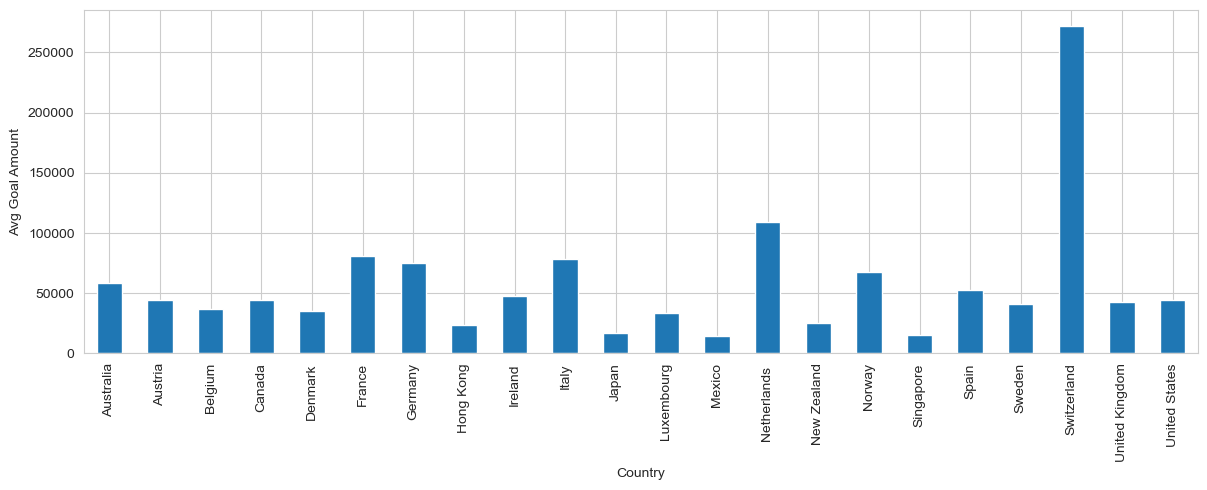

In [76]:
plt.figure(figsize=(12,5))
df_grouped_country.plot(kind='bar');
plt.tight_layout()
plt.ylabel('Avg Goal Amount');

### Find out the most successful project category for each country